                                 preprocessed_review
0  자극도 없고 사계절 내내 사용하기 좋은 평범한 토너 같아요 없으면 안 되는 그런 중...
1  솔직히 토너 많이 써봤는데 뭐 사야할지 모르겠어서 그냥 무난한거 썼어요 실제로도 무...
2  유튜버분 추천받고 구입한건데 순하고 좋아요 많이 묽어서 콧물제형은 싫고 물타입 제형...
3    베트남 하노이 필드 가시는 엄마 드리려고 구매했어요딱 2 개 남아있길래 구매수분 충전
4                         할인 많이 하고있어서 좋고 수분보충 정도 좋아요
scan vocabs ... 
num vocabs = 1788
done
  Keyword       Rank
0     좋아요  17.613477
1      토너  14.279383
2     토리든   9.209796
3      사용   8.970835
4      너무   8.663360
키워드가 /content/keywords.xlsx에 저장되었습니다.


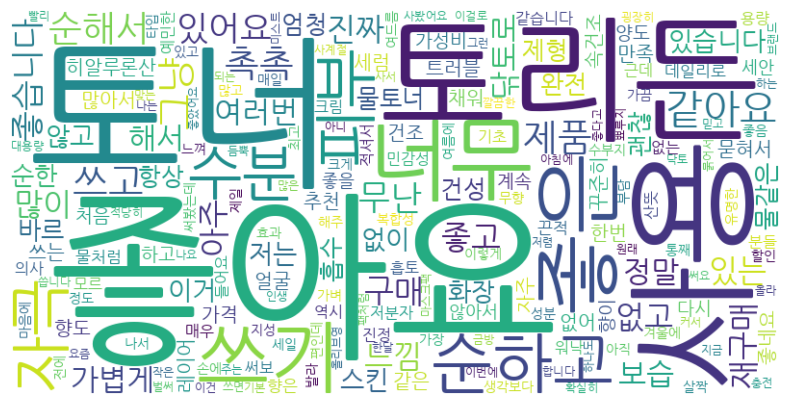

In [ ]:
# 1. 필요한 라이브러리 설치
!pip install pandas openpyxl krwordrank wordcloud matplotlib

# 2. 라이브러리 임포트
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager as fm

# 3. 엑셀 데이터 불러오기
file_path = '/content/토리든 토너 전처리.xlsx'  # 코랩에 업로드된 엑셀 파일 경로
df = pd.read_excel(file_path)

# 데이터 확인
print(df.head())

# 4. 리뷰 데이터를 리스트로 변환 및 전처리
reviews = df['preprocessed_review'].dropna().tolist()
normalized_reviews = [normalize(review, english=False, number=False) for review in reviews]

# 5. KRWordRank 인스턴스 생성 및 키워드 추출
wordrank_extractor = KRWordRank(min_count=5, max_length=10, verbose=True)
beta = 0.85
max_iter = 10
keywords, rank, graph = wordrank_extractor.extract(normalized_reviews, beta, max_iter)

# 6. 키워드를 데이터프레임으로 변환
top_keywords = sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:20]
keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Rank'])

# 데이터프레임 확인
print(keywords_df.head())

# 7. 결과를 새로운 엑셀 파일로 저장
output_file_path = '/content/keywords.xlsx'
keywords_df.to_excel(output_file_path, index=False)

print(f"키워드가 {output_file_path}에 저장되었습니다.")

# 8. 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# 9. 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 10. 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(keywords)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [3]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.6 MB/s eta 0:00:00


In [9]:
#명사추출
import pandas as pd
from konlpy.tag import Okt
import re
from krwordrank.word import KRWordRank

# Function to split sentences into noun-only sentences using Okt
def split_noun_sentences(text):
    okt = Okt()
    sentences = text.replace(". ", ".")
    sentences = re.sub(r'([^\n\s\.\?!]+[^\n\.\?!]*[\.\?!])', r'\1\n', sentences).strip().split("\n")

    result = []
    for sentence in sentences:
        if len(sentence) == 0:
            continue
        sentence_pos = okt.pos(sentence, stem=True)
        nouns = [word for word, pos in sentence_pos if pos == 'Noun']
        if len(nouns) <= 1:
            continue
        result.append(' '.join(nouns) + '.')

    return result

# Read data from Excel file
file_path = r"/content/토리든 토너 891개.xlsx"
df = pd.read_excel(file_path)

# Extract reviews from the specified column and drop NaN values
reviews = df['필드3'].dropna().tolist()

# Split reviews into noun-only sentences
noun_sentences = []
for review in reviews:
    noun_sentences.extend(split_noun_sentences(review))

# Create DataFrame from noun-only sentences and save to Excel
result_df = pd.DataFrame(noun_sentences, columns=['명사 문장'])

output_path = r"라운드랩_크림_명사_문장.xlsx"
result_df.to_excel(output_path, index=False, sheet_name='명사 문장')

print("명사로만 구성된 문장을 추출하여 저장했습니다.")


명사로만 구성된 문장을 추출하여 저장했습니다.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
from wordcloud import WordCloud

# 파일 경로 설정
file_path = r"/content/라운드랩_크림_명사_문장.xlsx"
output_path = r"라운드랩_크림_키워드.xlsx"
wordcloud_image_path = r"라운드랩_크림_워드클라우드.png"

# Excel 파일에서 데이터 읽기
df = pd.read_excel(file_path)

# 명사 문장 추출 및 필터링
noun_sentences = df['명사 문장'].dropna().tolist()
filtered_texts = [sentence for sentence in noun_sentences if len(sentence) > 1]

# KRWordRank 설정
min_count = 1
max_length = 10
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85
max_iter = 20

# 키워드 추출
keywords, rank, graph = wordrank_extractor.extract(filtered_texts, beta, max_iter)

# 상위 10개 키워드 선택
sorted_keywords = sorted(keywords.items(), key=lambda x: (x[1], sum(filtered_texts.count(x[0]) for filtered_texts in filtered_texts)), reverse=True)
top_keywords = dict(sorted_keywords[:10])  # 상위 10개 키워드를 딕셔너리 형태로 선택

# 상위 10개 키워드를 엑셀 파일로 저장
top_keywords_df = pd.DataFrame(list(top_keywords.items()), columns=['키워드', '랭크'])
top_keywords_df['빈도수'] = top_keywords_df['키워드'].apply(lambda x: sum(filtered_texts.count(x) for filtered_texts in filtered_texts))
top_keywords_df.to_excel(output_path, index=False, sheet_name='키워드')

print("상위 10개 키워드를 추출하여 저장했습니다.")

# 한글 폰트 설치 (Nanum 폰트)
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# 워드 클라우드 생성 및 시각화
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
plt.rc('font', family='NanumGothic')

wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(top_keywords)  # 상위 10개 키워드로 워드 클라우드 생성

# 워드 클라우드 이미지 생성 및 저장
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(wordcloud_image_path)  # 워드 클라우드 이미지 파일로 저장
plt.show()

print("워드 클라우드 이미지를 저장했습니다.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/라운드랩_크림_명사_문장.xlsx'

상위 10개 키워드를 추출하여 저장했습니다.


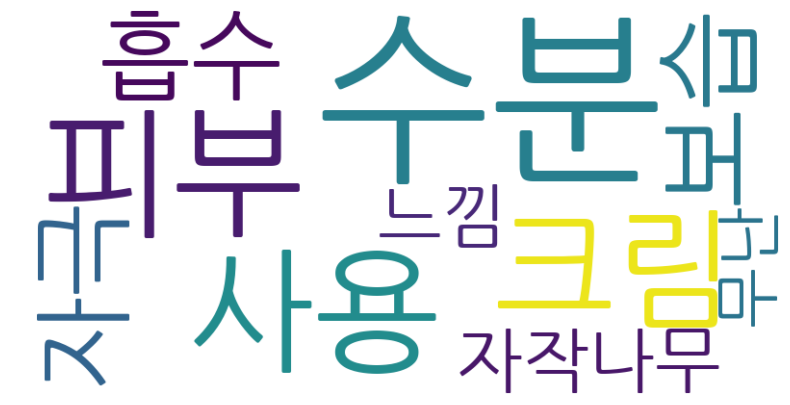

워드 클라우드 이미지를 저장했습니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
from wordcloud import WordCloud

# 파일 경로 설정
file_path = r"/content/라운드랩_크림_명사_문장.xlsx"
output_path = r"라운드랩_크림_키워드.xlsx"
wordcloud_image_path = r"라운드랩_크림_워드클라우드.png"

# Excel 파일에서 데이터 읽기
df = pd.read_excel(file_path)

# 명사 문장 추출 및 필터링
noun_sentences = df['명사 문장'].dropna().tolist()
filtered_texts = [sentence for sentence in noun_sentences if len(sentence) > 1]

# KRWordRank 설정
min_count = 1
max_length = 10
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85
max_iter = 20

# 키워드 추출
keywords, rank, graph = wordrank_extractor.extract(filtered_texts, beta, max_iter)

# 상위 10개 키워드 선택
sorted_keywords = sorted(keywords.items(), key=lambda x: (x[1], sum(filtered_texts.count(x[0]) for filtered_texts in filtered_texts)), reverse=True)
top_keywords = dict(sorted_keywords[:10])  # 상위 10개 키워드를 딕셔너리 형태로 선택

# 상위 10개 키워드를 엑셀 파일로 저장
top_keywords_df = pd.DataFrame(list(top_keywords.items()), columns=['키워드', '랭크'])
top_keywords_df['빈도수'] = top_keywords_df['키워드'].apply(lambda x: sum(filtered_texts.count(x) for filtered_texts in filtered_texts))
top_keywords_df.to_excel(output_path, index=False, sheet_name='키워드')

print("상위 10개 키워드를 추출하여 저장했습니다.")

# 한글 폰트 설치 (Nanum 폰트)
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# 워드 클라우드 생성 및 시각화
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
plt.rc('font', family='NanumGothic')

wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(top_keywords)  # 상위 10개 키워드로 워드 클라우드 생성

# 워드 클라우드 이미지 생성 및 저장
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(wordcloud_image_path)  # 워드 클라우드 이미지 파일로 저장
plt.show()

print("워드 클라우드 이미지를 저장했습니다.")


상위 10개 키워드:
자극: 랭크 19.098759107131826, 빈도수 184
수분: 랭크 15.553591353032916, 빈도수 170
무난: 랭크 13.051952587343216, 빈도수 143
스킨: 랭크 9.096817637870155, 빈도수 90
보습: 랭크 8.620131040365287, 빈도수 86
화장: 랭크 6.605307864452359, 빈도수 79
흡수: 랭크 6.292136054235846, 빈도수 70
건성: 랭크 5.6915588262690315, 빈도수 56
가격: 랭크 5.10104420811556, 빈도수 45
용량: 랭크 5.041605789296916, 빈도수 47
상위 10개 키워드를 추출하여 저장했습니다.


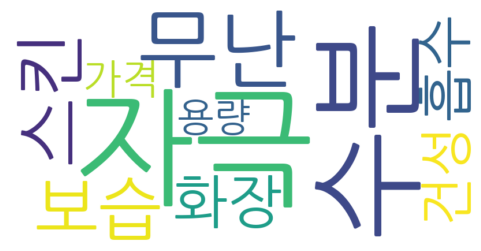

워드 클라우드 이미지를 저장했습니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
from wordcloud import WordCloud

# 파일 경로 설정
file_path = r"/content/키워드 추출 수정.xlsx"
output_path = r"라운드랩_크림_키워드.xlsx"
wordcloud_image_path = r"라운드랩_크림_워드클라우드.png"

# Excel 파일에서 데이터 읽기
df = pd.read_excel(file_path)

# 명사 문장 추출 및 필터링
noun_sentences = df['명사 문장'].dropna().tolist()
filtered_texts = [sentence for sentence in noun_sentences if len(sentence) > 1]

# KRWordRank 설정
min_count = 1
max_length = 10
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85
max_iter = 20

# 키워드 추출
keywords, rank, graph = wordrank_extractor.extract(filtered_texts, beta, max_iter)

# 상위 10개 키워드 선택
sorted_keywords = sorted(keywords.items(), key=lambda x: (x[1], sum(filtered_texts.count(x[0]) for filtered_texts in filtered_texts)), reverse=True)
top_keywords = dict(sorted_keywords[:10])  # 상위 10개 키워드를 딕셔너리 형태로 선택

# 상위 10개 키워드 출력
print("상위 10개 키워드:")
for word, r in top_keywords.items():
    frequency = sum(filtered_texts.count(word) for filtered_texts in filtered_texts)
    print(f"{word}: 랭크 {r}, 빈도수 {frequency}")

# 상위 10개 키워드를 엑셀 파일로 저장
top_keywords_df = pd.DataFrame(list(top_keywords.items()), columns=['키워드', '랭크'])
top_keywords_df['빈도수'] = top_keywords_df['키워드'].apply(lambda x: sum(filtered_texts.count(x) for filtered_texts in filtered_texts))
top_keywords_df.to_excel(output_path, index=False, sheet_name='키워드')

print("상위 10개 키워드를 추출하여 저장했습니다.")

# 한글 폰트 설치 (Nanum 폰트)
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# 워드 클라우드 생성 및 시각화
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
plt.rc('font', family='NanumGothic')

wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(top_keywords)  # 상위 10개 키워드로 워드 클라우드 생성

# 워드 클라우드 이미지 생성 및 저장
plt.figure(figsize=(6,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(wordcloud_image_path)  # 워드 클라우드 이미지 파일로 저장
plt.show()

print("워드 클라우드 이미지를 저장했습니다.")


     사용감:	36.4364	419
      타입:	31.6687	335
      반응:	28.3265	281
      특성:	27.2579	273
      기능:	27.1429	297
      얼굴:	4.4322	40
      정말:	4.2893	39
      아주:	3.8200	32
      레이:	3.2498	44
      무향:	2.9009	33
      완전:	2.8308	28
      효과:	2.8200	28
      기초:	2.7970	26
      양도:	2.7313	22
      일단:	2.6351	19
      가성:	2.5235	28
      다른:	2.4019	22
      항상:	2.4006	23
      바로:	2.3595	22
      충전:	2.3376	21
      민감:	2.2920	18
      생각:	2.2727	25
      약간:	2.2717	19
      처음:	2.2650	16
      정도:	2.2288	27
      성분:	2.2144	21
      크림:	2.1955	35
      겨울:	2.1027	20
      보고:	2.0961	18
      부담:	2.0931	23
      매우:	2.0292	12
      한번:	1.9947	21
      케어:	1.9630	18
      원래:	1.9601	15
      복합:	1.9410	18
      거.:	1.9013	23
      발라:	1.8747	19
      라인:	1.8668	15
      다음:	1.8609	24
      기본:	1.8593	13
      템.:	1.8564	20
      하나:	1.8070	19
      패드:	1.8067	14
      다시:	1.7608	13
      정착:	1.7562	17
      세안:	1.7536	23
      계속:	1.7506	18
      할인:	1.7482	16
      상품:	1.6981	12
      아침:	

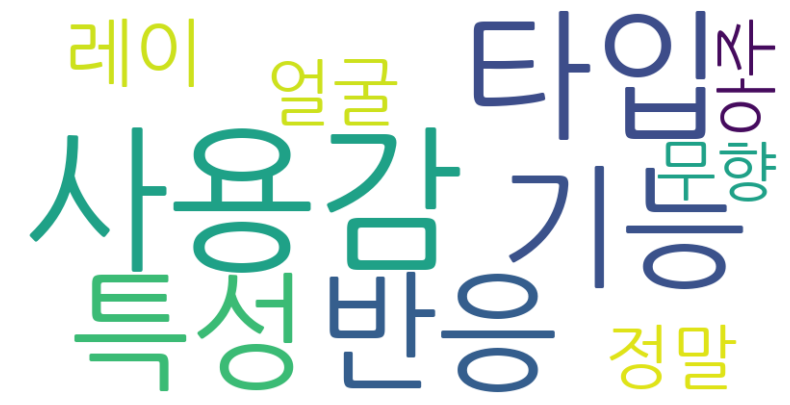

In [ ]:
#다음에 시도해보기(살짝 수정된 코드)
!pip install krwordrank
!pip install wordcloud

import pandas as pd
from krwordrank.word import KRWordRank
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 엑셀 파일 경로
file_path = r"/content/키워드 추출_4.xlsx"

# 엑셀 파일을 읽어들입니다.
df = pd.read_excel(file_path)

# '명사 문장' 열에서 데이터를 가져옵니다.
noun_sentences = df['명사 문장'].dropna().tolist()

# 결측치와 한 글자인 데이터를 무시합니다.
filtered_texts = [sentence for sentence in noun_sentences if len(sentence) > 1]

# KRWordRank를 사용하여 키워드 추출
min_count = 1   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 20

# 텍스트에서 키워드 추출
keywords, rank, graph = wordrank_extractor.extract(filtered_texts, beta, max_iter)

# 빈도수 계산
word_freq = {word: 0 for word in keywords}
for sentence in filtered_texts:
    for word in keywords:
        word_freq[word] += sentence.count(word)

# 키워드, 랭크, 빈도수를 출력
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True):
    print('%8s:\t%.4f\t%d' % (word, r, word_freq[word]))

# 키워드를 DataFrame으로 변환
keywords_df = pd.DataFrame(
    [(word, r, word_freq[word]) for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)],
    columns=['키워드', '랭크', '빈도수']

)

top_keywords = dict(keywords_df.head(10).set_index('키워드')['빈도수'])

!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# 9. 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 10. 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(top_keywords)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
!pip install krwordrank
!pip install wordcloud

In [36]:
#명사추출
import pandas as pd
from konlpy.tag import Okt
import re
from krwordrank.word import KRWordRank

# Function to split sentences into noun-only sentences using Okt
def split_noun_sentences(text):
    okt = Okt()
    sentences = text.replace(". ", ".")
    sentences = re.sub(r'([^\n\s\.\?!]+[^\n\.\?!]*[\.\?!])', r'\1\n', sentences).strip().split("\n")

    result = []
    for sentence in sentences:
        if len(sentence) == 0:
            continue
        sentence_pos = okt.pos(sentence, stem=True)
        nouns = [word for word, pos in sentence_pos if pos == 'Noun']
        if len(nouns) <= 1:
            continue
        result.append(' '.join(nouns) + '.')

    return result

# Read data from Excel file
file_path = r"/content/VT 리들샷 100 에센스.xlsx"
df = pd.read_excel(file_path)

# Extract reviews from the specified column and drop NaN values
reviews = df['필드3'].dropna().tolist()

# Split reviews into noun-only sentences
noun_sentences = []
for review in reviews:
    noun_sentences.extend(split_noun_sentences(review))

# Create DataFrame from noun-only sentences and save to Excel
result_df = pd.DataFrame(noun_sentences, columns=['명사 문장'])

output_path = r"VT_세럼_명사.xlsx"
result_df.to_excel(output_path, index=False, sheet_name='명사 문장')

print("명사로만 구성된 문장을 추출하여 저장했습니다.")

명사로만 구성된 문장을 추출하여 저장했습니다.


In [40]:
#최최최최종
import pandas as pd
from krwordrank.word import KRWordRank

# 엑셀 파일 경로
file_path = r"/content/VT_세럼_키워드.xlsx"

# 엑셀 파일을 읽어들입니다.
df = pd.read_excel(file_path)

# '명사 문장' 열에서 데이터를 가져옵니다.
noun_sentences = df['명사 문장'].dropna().tolist()

# 결측치와 한 글자인 데이터를 무시합니다.
filtered_texts = [sentence for sentence in noun_sentences if len(sentence) > 1]

# KRWordRank를 사용하여 키워드 추출
min_count = 1   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 20

# 텍스트에서 키워드 추출
keywords, rank, graph = wordrank_extractor.extract(filtered_texts, beta, max_iter)

# 빈도수 계산
word_freq = {word: 0 for word in keywords}
for sentence in filtered_texts:
    for word in keywords:
        word_freq[word] += sentence.count(word)

# 키워드, 랭크, 빈도수를 출력
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True):
    print('%8s:\t%.4f\t%d' % (word, r, word_freq[word]))

# 키워드를 DataFrame으로 변환
keywords_df = pd.DataFrame(
    [(word, r, word_freq[word]) for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)],
    columns=['키워드', '랭크', '빈도수']

)

top_keywords = dict(keywords_df.head(40).set_index('키워드')['빈도수'])

!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# 9. 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 10. 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(top_keywords)

# 워드 클라우드 시각화
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

      기능:	68.2950	692
     사용감:	32.3030	319
      반응:	29.9808	299
      특성:	23.1288	216
      타입:	8.9934	75
      보고:	3.2532	31
      편이:	3.1956	23
      일단:	3.0202	22
      그냥:	3.0039	24
      거.:	2.9720	27
      친구:	2.9497	26
      사람:	2.9088	25
      요즘:	2.9016	18
      기초:	2.8675	23
      에센:	2.7113	21
      고민:	2.5959	25
      리뷰:	2.5908	16
      약간:	2.5868	26
      가끔:	2.5744	18
      뭔가:	2.4338	21
      크게:	2.4059	20
     테스트:	2.2944	18
      오히:	2.2468	20
      저녁:	2.1668	25
      후기:	2.1421	24
      기분:	2.0899	17
      거의:	2.0121	21
      바로:	1.9874	20
      자주:	1.9509	16
      아주:	1.8789	14
      관리:	1.8571	17
      단계:	1.8456	17
      일리:	1.7595	28
      선물:	1.7427	18
      별로:	1.7420	18
      더.:	1.6953	25
      때문:	1.6938	14
      하루:	1.6237	16
      도움:	1.5845	12
      걱정:	1.5204	16
      쓰기:	1.5194	15
      수.:	1.5139	13
      자체:	1.4820	12
      변화:	1.4654	13
      대란:	1.4638	11
      컨디:	1.4230	12
      해.:	1.4102	23
      달라:	1.4000	12
      사서:	1.3991	16
    반신반의:	1.

NameError: name 'font_manager' is not defined